=== Métriques de classification ===
Accuracy : 0.956
Precision : 0.959
Recall (sensibilité) : 0.972
F1-score : 0.966
AUC-ROC : 0.994

=== Rapport détaillé par classe ===
              precision    recall  f1-score   support

   malignant       0.95      0.93      0.94        42
      benign       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



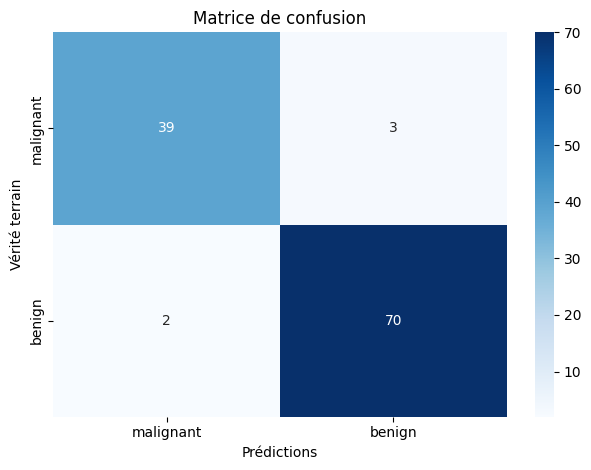

In [2]:
"""
metrics_classification.py
-------------------------
Exemple simple de calcul des métriques de classification :
Accuracy, Precision, Recall, F1-score, AUC-ROC + matrice de confusion.
"""

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report,
)
import matplotlib.pyplot as plt
import seaborn as sns  # facultatif, juste pour une jolie matrice

def main():
    # 1. Charger un dataset de classification (binaire ici)
    data = load_breast_cancer()
    X, y = data.data, data.target

    # 2. Séparer en train / test
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # 3. Entraîner un modèle simple (baseline)
    clf = RandomForestClassifier(
        n_estimators=100,
        max_depth=None,
        random_state=42,
        n_jobs=-1,
    )
    clf.fit(X_train, y_train)

    # 4. Prédictions
    y_pred = clf.predict(X_test)
    y_proba = clf.predict_proba(X_test)[:, 1]  # proba classe positive pour AUC

    # 5. Calcul des métriques de classification
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    cm = confusion_matrix(y_test, y_pred)

    print("=== Métriques de classification ===")
    print(f"Accuracy : {acc:.3f}")
    print(f"Precision : {prec:.3f}")
    print(f"Recall (sensibilité) : {rec:.3f}")
    print(f"F1-score : {f1:.3f}")
    print(f"AUC-ROC : {auc:.3f}\n")

    print("=== Rapport détaillé par classe ===")
    print(classification_report(y_test, y_pred, target_names=data.target_names))

    # 6. Afficher la matrice de confusion
    plt.figure()
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=data.target_names,
                yticklabels=data.target_names)
    plt.xlabel("Prédictions")
    plt.ylabel("Vérité terrain")
    plt.title("Matrice de confusion")
    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    main()
